<a href="https://colab.research.google.com/github/furu-tuan-dong/CS114.K21.KHTN/blob/master/case_study_1_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Người thực hiện:


1.   Nguyễn Phúc Đạt      MSSV: 18520573
2.   Đồng Quốc Tuấn       MSSV: 18520185





## Mô tả bài toán

Sarcasm Dectection là bài toán phân tích cảm xúc thuộc dạng bài toán phân tích ngữ nghĩa văn bản mà cụ thể ở đây là tiêu đề của bài báo. 


*   Input của bài toán: tiêu đề của 1 bài báo 
*   Output: châm biếm / không châm biếm








## Cách thu thập dataset

Dataset của bài toán được lấy từ Kaggle và được lưu dưới định dạng file json, dataset bao gồm sấp sỉ 29000 tiêu đề đươc lấy từ 2 trang web tin tức là [TheOnion](https://www.theonion.com/) và [HuffPost](https://www.huffpost.com/). <br />


Trong đó, TheOnion là website chuyên đưa ra những bài báo mang tính châm biếm còn HuffPost thì đưa những tin tức chính thống (không mang tính chấm biếm)

Mỗi headline sẽ bao gồm các 3 thuộc tính:


1.   is_sarcastic: 1 nếu headline là chấm biếm, ngược lại là 0
2.   headline: tiêu đề của bài báo
3.   article_link: đường dẫn đến bài báo gốc








       is_sarcastic                                           headline
0                 1  thirtysomething scientists unveil doomsday clo...
1                 0  dem rep. totally nails why congress is falling...
2                 0  eat your veggies: 9 deliciously different recipes
3                 1  inclement weather prevents liar from getting t...
4                 1  mother comes pretty close to using word 'strea...
...             ...                                                ...
28614             1       jews to celebrate rosh hashasha or something
28615             1  internal affairs investigator disappointed con...
28616             0  the most beautiful acceptance speech this week...
28617             1  mars probe destroyed by orbiting spielberg-gat...
28618             1                 dad clarifies this not a food stop

[28619 rows x 2 columns]
(28619, 2)


<BarContainer object of 2 artists>

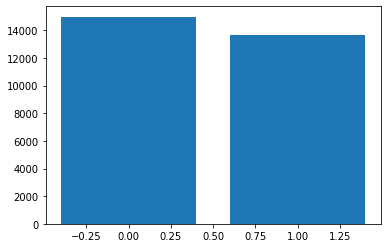

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#đọc dữ liệu
df = pd.read_json("/content/drive/My Drive/Colab Notebooks/sarcasm_datasets/Sarcasm_Headlines_Dataset_v2.json", lines=True)

# trong bài toán này ta chỉ xử lý headline nên article_link có thể loại bỏ đi
df = df.drop(['article_link'], axis=1)
print(df)
print(df.shape)

labels = [1, 0]
count = np.zeros(2)
for i in range(0, len(df)):
  if df["is_sarcastic"][i] == 1:
    count[0] += 1
  else:
    count[1] += 1
plt.bar(labels, count)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cách thu thập 2000 headlines cho testset

Sử dụng Web Scraper - tool dùng để lấy dữ liệu trên các websites mà không cần đến code https://webscraper.io/ 
<br/>
<br/>
1000 headlines sẽ được scrape từ Huffpost và 1000 headlines còn lại sẽ được scrape từ TheOnion
<br/>
<br/>
Đây là 2 videos về cách lấy dữ liệu từ 2 trang


*   TheOnion: https://drive.google.com/file/d/1WSIpQbrYM7RSfCGC6HFs0RM_kWhutFA4/view
*   HuffPost: https://drive.google.com/file/d/1KadMqxKephrgjCK7G5PC1PAXCrXzOnKu/view?usp=sharing




In [ ]:
df_huffpost = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sarcasm_datasets/huffpost.csv")
df_huffpost.head()

,web-scraper-order,web-scraper-start-url,headlines
0,1592766684-10467,https://www.huffpost.com/news/,"With Trump's Approval Plunging, Republicans Sa..."
1,1592766684-10764,https://www.huffpost.com/news/,Federal Agents Release Coronavirus Masks Seize...
2,1592766684-10518,https://www.huffpost.com/news/,Coronavirus Live Updates: Read The Latest Abou...
3,1592766684-10362,https://www.huffpost.com/news/,GOP Senator Touts Low Black Unemployment As Bl...
4,1592766684-10355,https://www.huffpost.com/news/,Band-Aid Announces New Bandages That 'Embrace ...


In [ ]:
df_huffpost = df_huffpost.drop(["web-scraper-order", "web-scraper-start-url"], axis = 1) 
df_huffpost["is_sarcastic"] = 0
print(df_huffpost.head())
print(df_huffpost.shape)

                                           headlines  is_sarcastic
0  With Trump's Approval Plunging, Republicans Sa...             0
1  Federal Agents Release Coronavirus Masks Seize...             0
2  Coronavirus Live Updates: Read The Latest Abou...             0
3  GOP Senator Touts Low Black Unemployment As Bl...             0
4  Band-Aid Announces New Bandages That 'Embrace ...             0
(1168, 2)


In [ ]:
df_theonion = pd.read_csv("/content/drive/My Drive/Colab Notebooks/sarcasm_datasets/theonion.csv")
df_theonion.head()


,web-scraper-order,web-scraper-start-url,pagination,pagination-href,headlines
0,1592743885-6805,https://www.theonion.com/latest,More stories,https://www.theonion.com/latest?startTime=1584...,Woman Tries To Spark Casual Chat In Long Groce...
1,1592743768-6546,https://www.theonion.com/latest,More stories,https://www.theonion.com/latest?startTime=1586...,"Your Horoscopes — Week Of April 14, 2020"
2,1592743533-6048,https://www.theonion.com/latest,More stories,https://www.theonion.com/latest?startTime=1591...,Apparently Even Fence Feels Need To Comment On...
3,1592744460-7987,https://www.theonion.com/latest,More stories,https://www.theonion.com/latest?startTime=1572...,Dad Reports Old Guy Being Honored On Field Alw...
4,1592743758-6538,https://www.theonion.com/latest,More stories,https://www.theonion.com/latest?startTime=1587...,Obama: ‘I’m So Proud To Endorse Joe Biden—That...


In [ ]:
df_theonion = df_theonion.drop(["web-scraper-order", "web-scraper-start-url", "pagination", "pagination-href"], axis = 1)
df_theonion["is_sarcastic"] = 1
print(df_theonion.head())
print(df_theonion.shape)

                                           headlines  is_sarcastic
0  Woman Tries To Spark Casual Chat In Long Groce...             1
1           Your Horoscopes — Week Of April 14, 2020             1
2  Apparently Even Fence Feels Need To Comment On...             1
3  Dad Reports Old Guy Being Honored On Field Alw...             1
4  Obama: ‘I’m So Proud To Endorse Joe Biden—That...             1
(1980, 2)


In [ ]:
new_df1 = pd.DataFrame(df_huffpost.values[0:1001], columns=['headlines', 'is_sarcastic'])
new_df1 = new_df1.dropna()
new_df2 = pd.DataFrame(df_theonion.values[0:1000], columns=['headlines', 'is_sarcastic'])
new_df2 = new_df2.dropna()
test_df = new_df1.append(new_df2, ignore_index=True)

test_df['is_sarcastic'] = test_df['is_sarcastic'].astype('int64')
print(test_df)

                                              headlines  is_sarcastic
0     With Trump's Approval Plunging, Republicans Sa...             0
1     Federal Agents Release Coronavirus Masks Seize...             0
2     Coronavirus Live Updates: Read The Latest Abou...             0
3     GOP Senator Touts Low Black Unemployment As Bl...             0
4     Band-Aid Announces New Bandages That 'Embrace ...             0
...                                                 ...           ...
1995  Scientists Train Rats To Drive Tiny Cars To Co...             1
1996  Contrarian ‘New York Times’ Travel Section Bre...             1
1997  CEO Of Robotics Corporation Tells Sobbing Andr...             1
1998  Tips For Dealing With Roommates During Coronav...             1
1999  No Way In Hell Man Going To Start Examining Re...             1

[2000 rows x 2 columns]


## Cách xử lý dữ liệu (pre-processing)

### Tiền cử lý dữ liệu cho tập train



*   Loại bỏ các ký tự đặc biệt(dấu câu, dấu cách, etc)
*   Loại bỏ các stopwords (trong trường hợp này stopword là những từ không có nhiều ý nghĩa trong tiêu đề, ví dụ như những từ he, have, the etc)
*   Stemming words




In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import re

stop_words = set(stopwords.words("english"))   # list cac stopwords trong tieng Anh
df['headline'] = df['headline'].apply(lambda x: x.lower()) # convert to lowercase
df['headline'] = df['headline'].apply((lambda x: re.sub("[^a-zA-z0-9\s]", '', x))) # remove special character
df['headline'] = df['headline'].apply((lambda x: re.sub("[/(){}\[\]\|@,;]", '', x))) # remove punctuation

for i in range (0, len(df)):
  df["headline"][i] = ' '.join(word for word in df["headline"][i].split(" ") if word not in stop_words) 
  # loai bo cac stopwords trong df

ps = PorterStemmer()
for i in range(0, len(df)):
  df["headline"][i] = ' '.join(ps.stem(word) for word in df["headline"][i].split(" "))
  # stemming words

print(df)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


       is_sarcastic                                           headline
0                 1  thirtysometh scientist unveil doomsday clock h...
1                 0  dem rep total nail congress fall short gender ...
2                 0                    eat veggi 9 delici differ recip
3                 1            inclement weather prevent liar get work
4                 1  mother come pretti close use word stream corre...
...             ...                                                ...
28614             1                    jew celebr rosh hashasha someth
28615             1  intern affair investig disappoint conspiraci d...
28616             0        beauti accept speech week came queer korean
28617             1     mar probe destroy orbit spielbergg space palac
28618             1                              dad clarifi food stop

[28619 rows x 2 columns]


### Tiền xử lý dữ liệu cho tập test


In [ ]:
stop_words = set(stopwords.words("english"))   # list cac stopwords trong tieng Anh
test_df['headlines'] = test_df['headlines'].apply(lambda x: x.lower()) # convert to lowercase
test_df['headlines'] = test_df['headlines'].apply((lambda x: re.sub("[^a-zA-z0-9\s]", '', x))) # remove special character
test_df['headlines'] = test_df['headlines'].apply((lambda x: re.sub("[/(){}\[\]\|@,;]", '', x))) # remove punctuation

for i in range (0, len(test_df)):
  test_df["headlines"][i] = ' '.join(word for word in test_df["headlines"][i].split(" ") if word not in stop_words) 
  # loai bo cac stopwords trong df
for i in range(0, len(test_df)):
  test_df["headlines"][i] = ' '.join(ps.stem(word) for word in test_df["headlines"][i].split(" "))
  # stemming words

print(test_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


                                              headlines  is_sarcastic
0         trump approv plung republican say earli panic             0
1     feder agent releas coronaviru mask seiz black ...             0
2     coronaviru live updat read latest covid19 outb...             0
3     gop senat tout low black unemploy black unempl...             0
4     bandaid announc new bandag embrac beauti diver...             0
...                                                 ...           ...
1995    scientist train rat drive tini car collect food             1
1996  contrarian new york time travel section break ...             1
1997  ceo robot corpor tell sob andrew yang greatest...             1
1998                   tip deal roommat coronaviru isol             1
1999  way hell man go start examin relationship food...             1

[2000 rows x 2 columns]


###Split training_set/ validation_set

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(df["headline"], df["is_sarcastic"], train_size=0.8, random_state=42)
print(x_train.shape)
print(x_val.shape)

(22895,)
(5724,)


## Feature Engineering

TF-IDF (Term Frequency – Inverse Document Frequency) là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản. Giá trị cao thể hiện độ quan trọng cao và nó phụ thuộc vào số lần từ xuất hiện trong văn bản nhưng bù lại bởi tần suất của từ đó trong tập dữ liệu. Một vài biến thể của tf-idf thường được sử dụng trong các hệ thống tìm kiếm như một công cụ chính để đánh giá và sắp xếp văn bản dựa vào truy vấn của người dùng.  Tf-idf cũng được sử dụng để lọc những từ stopwords trong các bài toán như tóm tắt văn bản và phân loại văn bản.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(x_train)
print(len(tf.vocabulary_))
vector_train = tf.transform(x_train)
vector_val = tf.transform(x_val)

print (tf.vocabulary_)
print (tf.idf_)


18486
{'trump': 16905, 'realli': 13428, 'feel': 6133, 'queer': 13236, 'peopl': 12290, 'explain': 5887, 'one': 11713, 'sentenc': 14659, 'egyptian': 5439, 'death': 4522, 'soccer': 15283, 'fan': 6023, 'put': 13190, 'presid': 12901, 'iron': 8649, 'grip': 7285, 'test': 16407, 'stripper': 15832, 'fail': 5989, 'school': 14423, 'she': 14800, 'work': 18227, 'self': 14580, 'texa': 16416, 'attorney': 1586, 'gener': 6889, 'ken': 9067, 'paxton': 12215, 'indict': 8395, 'congresswoman': 3880, 'fight': 6220, 'gun': 7378, 'control': 3950, 'almost': 1081, 'lost': 9823, 'life': 9613, 'violenc': 17682, 'lana': 9351, 'del': 4630, 'rey': 13857, 'stevi': 15718, 'nick': 11288, 'cast': 3101, 'joint': 8879, 'music': 11028, 'spell': 15468, 'upcom': 17409, 'album': 995, 'food': 6448, 'insecur': 8498, 'inact': 8333, 'drive': 5212, 'obes': 11569, 'epidem': 5671, 'here': 7779, 'remind': 13670, 'far': 6035, 'donald': 5088, 'flipflop': 6379, 'health': 7678, 'care': 3027, 'disgruntl': 4944, 'liber': 9593, 'publish': 13

In [ ]:
print(vector_train[0])

  (0, 16905)	0.22338036551581278
  (0, 14659)	0.435720901871343
  (0, 13428)	0.33914026672547615
  (0, 13236)	0.4259680642208613
  (0, 12290)	0.3077909875189114
  (0, 11713)	0.2900609427256581
  (0, 6133)	0.35014853467855606
  (0, 5887)	0.40287585791834996


## Chọn model, học và fine tuning


###SVM


In [ ]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(vector_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Accuracy on test set: {:.3f}".format(model_svm.score(vector_val, y_val)))
print("Accuracy on training set: {:.3f}".format(model_svm.score(vector_train, y_train)))

Accuracy on test set: 0.798
Accuracy on training set: 0.984


###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LG = LogisticRegression()
model_LG.fit(vector_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Accuracy on test set: {:.3f}".format(model_LG.score(vector_val, y_val)))
print("Accuracy on training set: {:.3f}".format(model_LG.score(vector_train, y_train)))

Accuracy on test set: 0.790
Accuracy on training set: 0.877


### Bayes Naives


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_bayes = BernoulliNB()
model_bayes.fit(vector_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
print("Accuracy on test set: {:.3f}".format(model_bayes.score(vector_val, y_val)))
print("Accuracy on training set: {:.3f}".format(model_bayes.score(vector_train, y_train)))

Accuracy on test set: 0.803
Accuracy on training set: 0.892


## Áp dụng 2000 headlines mới cho 3 model vừa train


In [ ]:
x_test = test_df["headlines"]
y_test = test_df["is_sarcastic"]
vector_test = tf.transform(x_test)
print(x_test[0])
print(vector_test[0])



trump approv plung republican say earli panic
  (0, 16905)	0.21193211853969016
  (0, 14362)	0.2589787260807307
  (0, 13738)	0.3322034171921949
  (0, 12593)	0.4669482629697442
  (0, 12071)	0.47081543234949397
  (0, 5348)	0.404137194744573
  (0, 1382)	0.4178767310700533


### SVM


In [ ]:
model_svm.score(vector_test, y_test)

0.687

### Logistic Regression


In [ ]:
model_LG.score(vector_test, y_test)

0.68

### Bayes Naives

In [ ]:
model_bayes.score(vector_test, y_test)

0.7165

### Nhận xét


So sánh các kết quả ta thấy Bayes Naives mà cụ thể là thuật tuán BernolliNB cho kết quả cao nhất là 71.65%
<br/>
Do đó ta chọn Bayes Naives để thực hiện dự đoán headline bên dưới

## Thực hiện sacarsm detection cho một headline bất kỳ được nhập vào.

In [ ]:
input = ["Tide Accused Of Over-Inflating Number Of Children Who Roll Around In Mud Puddles Before Running Into House", 
"Washington's Lone Voice In Congress Praises 'Historic' Vote For Statehood"]


<class 'list'>


In [ ]:
#preprocessing input
for i in range (0, len(input)):
  input[i] = input[i].lower() # convert to lowercase
  re.sub("[^a-zA-z0-9\s]", '', input[i]) # remove special character
  re.sub("[/(){}\[\]\|@,;]", '', input[i]) # remove punctuation
    
  input[i] = ' '.join(word for word in input[i].split(" ") if word not in stop_words) # loai bo cac stopwords trong df

  input[i] = ' '.join(ps.stem(word) for word in input[i].split(" "))
    # stemming words
vec_input = tf.transform(input)
print(input[0])
print(vec_input[0])
print(input[1])
print(vec_input[1])

tide accu over-infl number children roll around mud puddl run hou
  (0, 16556)	0.36594970376984454
  (0, 14163)	0.24288639167593418
  (0, 14031)	0.2975351615322388
  (0, 13127)	0.39027821454721784
  (0, 11910)	0.42820352023498776
  (0, 11516)	0.28607066880735116
  (0, 10954)	0.41142130511940506
  (0, 3373)	0.2597863594605429
  (0, 1454)	0.2535579475973691
washington' lone voic congress prai 'historic' vote statehood
  (0, 17869)	0.37681168234125023
  (0, 17749)	0.3255395893908224
  (0, 17726)	0.38324798007887495
  (0, 15662)	0.5431807419334495
  (0, 9769)	0.431874572354958
  (0, 3873)	0.3515635830141162


In [ ]:
if model_bayes.predict(vec_input[0]) == 0:
  print("Headline is not sarcastic")
else:
  print("Headline is sarcastic")

if model_bayes.predict(vec_input[1]) == 0:
  print("Headline is not sarcastic")
else:
  print("Headline is sarcastic")

Headline is sarcastic
Headline is not sarcastic


In [ ]:
if model_LG.predict(vec_input[0]) == 0:
  print("Headline is not sarcastic")
else:
  print("Headline is sarcastic")

if model_LG.predict(vec_input[1]) == 0:
  print("Headline is not sarcastic")
else:
  print("Headline is sarcastic")

Headline is sarcastic
Headline is not sarcastic


In [ ]:
if model_svm.predict(vec_input[0]) == 0:
  print("Headline is not sarcastic")
else:
  print("Headline is sarcastic")

if model_svm.predict(vec_input[1]) == 0:
  print("Headline is not sarcastic")
else:
  print("Headline is sarcastic")

Headline is sarcastic
Headline is not sarcastic


## Nhận xét

Đối với input đầu tiên là có tính châm biếm thì cả 3 model predict đúng
<br/>
Đối với input thứ hai là không có tính châm biếm thì cả 3 model cũng predict đúng